In [1]:
import pandas as pd
df = pd.read_excel("OnlineRetail.xlsx")

In [2]:
df['Total'] = df['Quantity'] * df['UnitPrice']
#BY multiplying the quantity and uniteprice we can dervie the total amount a customer spend on a that product.

In [3]:
df.info()
#the df datasets has 541909 rows and 8 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   Total        541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.2+ MB


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# Dealing with the null values

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID,Total
count,541909.000000,541909.000000,406829.000000,541909.000000
mean,9.552250,4.611114,15287.690570,17.987795
std,218.081158,96.759853,1713.600303,378.810824
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,3.400000
50%,3.000000,2.080000,15152.000000,9.750000
75%,10.000000,4.130000,16791.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [6]:
# Check for null values in the 'Description' column
null_description = df['Description'].isnull().sum()
# Print the number of null values in 'Description'
print('Number of null values in Description:', null_description)

Number of null values in Description: 1454


In [7]:
## there are null values in the Description and CustomerID. We can either remove the rows or impute with media/mostfrequent values.
#we cant add mostfrequent to the description null values becuse we dont want defines customer purchases so iam gone drop the null vlaues
## with "Unknow" and for the customer id null values will be impute with the median so that we dont have to loss any data

# Fill missing values in 'Description' with 'Unknown'
# Drop rows where 'Description' is null
df.dropna(subset=['Description'], inplace=True)
df.reset_index(drop=True, inplace=True)
# Fill missing values in 'CustomerID' with median
median_customer_id = df['CustomerID'].median()
df['CustomerID'].fillna(median_customer_id, inplace=True)
# Drop any remaining rows with missing values
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540455 entries, 0 to 540454
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    540455 non-null  object        
 1   StockCode    540455 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     540455 non-null  int64         
 4   InvoiceDate  540455 non-null  datetime64[ns]
 5   UnitPrice    540455 non-null  float64       
 6   CustomerID   540455 non-null  float64       
 7   Country      540455 non-null  object        
 8   Total        540455 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.1+ MB



# Dropping the rows that the doesnt shows the sales of the products

In [8]:
# Convert 'StockCode' to string type if it's not already
df['StockCode'] = df['StockCode'].astype(str)
# Get non-numeric 'StockCode' values
non_numeric_stockcodes = df[~df['StockCode'].str.contains(r'\d', na=False)]['StockCode']
# Filter the DataFrame where 'StockCode' is one of the non-numeric 'StockCode' values
_df = df[df['StockCode'].isin(non_numeric_stockcodes)]
print(non_numeric_stockcodes.unique())

['POST' 'D' 'DOT' 'M' 'BANK CHARGES' 'S' 'AMAZONFEE' 'm' 'DCGSSBOY'
 'DCGSSGIRL' 'PADS' 'B' 'CRUK']


In [9]:
# List of 'StockCode' that doesnt belong to the products
scnotproducts = ['POST', 'D', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE', 'm', 'B', 'CRUK']

# Filter the DataFrame to keep rows where 'StockCode' is not in the list
dff = df[~df['StockCode'].isin(scnotproducts)]
dff.describe() # removing them didnt effected the mean

,Quantity,UnitPrice,CustomerID,Total
count,537692.000000,537692.000000,537692.000000,537692.000000
mean,9.642124,3.290984,15259.673817,18.226756
std,218.528597,4.563324,1485.642127,367.529891
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,1.000000,1.250000,14375.000000,3.480000
50%,3.000000,2.080000,15152.000000,9.750000
75%,10.000000,4.130000,16271.000000,17.400000
max,80995.000000,649.500000,18287.000000,168469.600000


In [10]:
import pandas as pd
#Looking for the Invoices starts with c becuse they are cancelled
c_invoice_count  = dff[dff['InvoiceNo'].str.contains('C', na=False, case=False)]['InvoiceNo'].count()
print("Count of 'Invoice No' starting with 'c':", c_invoice_count )

## There are 8706 orders are cancelled and sent a refund to the customers.

Count of 'Invoice No' starting with 'c': 8706


In [11]:
# Drop rows where 'InvoiceNo' starts with 'C'
filtdff = dff[~dff['InvoiceNo'].str.contains('^C', na=False, case=False, regex=True)]
dff = dff[dff['Quantity'] >= 0] # dropped all the rows where quantity is less than 0 becuse they are definately not product sales


In [12]:
dff.describe() #now can we see clear statistical information of the data.

,Quantity,UnitPrice,CustomerID,Total
count,528512.000000,528512.000000,528512.000000,528512.000000
mean,10.628569,3.275322,15264.056546,19.449265
std,156.926098,4.447718,1482.359422,268.415323
min,1.000000,0.000000,12346.000000,0.000000
25%,1.000000,1.250000,14393.000000,3.750000
50%,3.000000,2.080000,15152.000000,9.900000
75%,11.000000,4.130000,16271.000000,17.400000
max,80995.000000,649.500000,18287.000000,168469.600000


# Distribution & Visualization

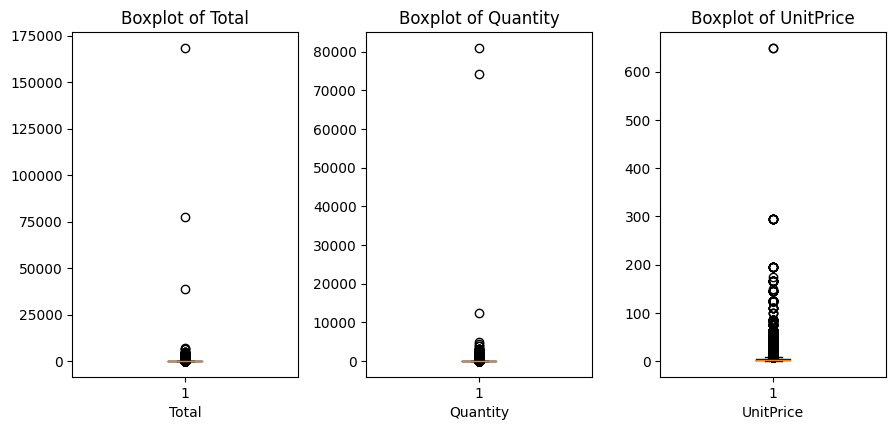

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Create histograms for numeric columns
columnsnumb = ['Total','Quantity', 'UnitPrice']

# creating function which will create the boxplots for the mentioned columns
def boxplotfun(df,columns_umb):
  plt.figure(figsize=(12, 8))
  for i, col in enumerate(columns_umb, start=1):
      plt.subplot(2, 4, i)
      plt.boxplot(df[col])
      plt.xlabel(col)
      plt.title(f'Boxplot of {col}')

  plt.tight_layout()
  plt.show()
#calling the fucntion
boxplotfun(dff,columnsnumb)

The Boxplots shows that the data doesnt fall between the quarters

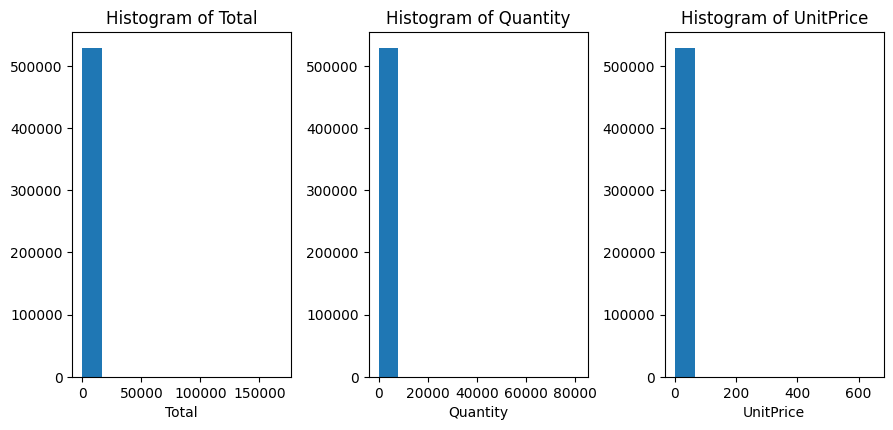

In [14]:
def histogramm(df,columns_umb):
  plt.figure(figsize=(12, 8))
  for i, col in enumerate(columns_umb, start=1):
      plt.subplot(2, 4, i)
      plt.hist(df[col])
      plt.xlabel(col)
      plt.title(f'Histogram of {col}')

  plt.tight_layout()
  plt.show()

histogramm(dff,columnsnumb)

 the two histograms shapes are right skewed. Every histogram shows a peak bar crossing 500k which tells us that 90% of sales are in the lower region values of the data.

<ipython-input-15-f915e6b074c4>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(top_100_customer_countries.unique()))


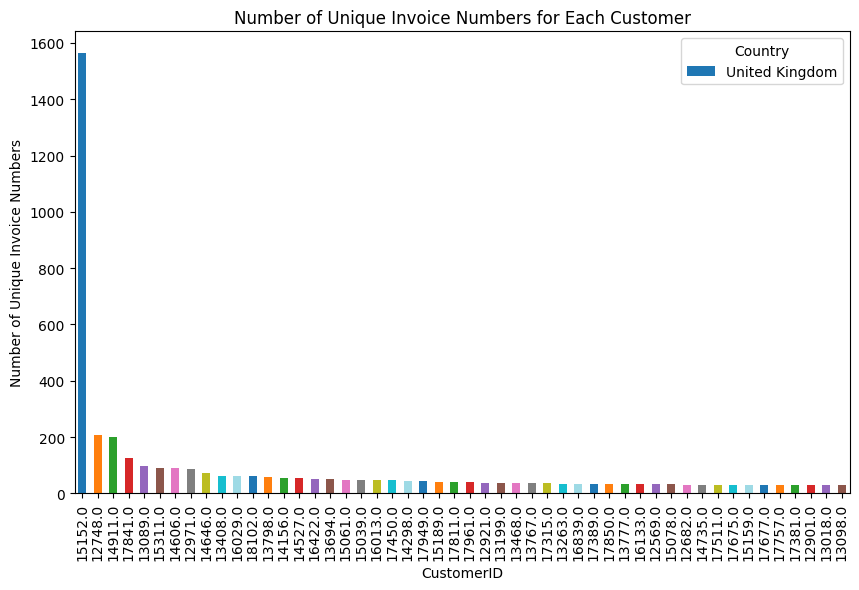

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by CustomerID and count unique InvoiceNo for each CustomerID
customer_invoice_counts = dff.groupby('CustomerID')['InvoiceNo'].nunique()
top_100_customers = customer_invoice_counts.nlargest(50)

# Get unique country names corresponding to the top 100 customers
top_100_customer_countries = dff[dff['CustomerID'].isin(top_100_customers.index)]['Country']

# Create a color map for each country
colors = plt.cm.get_cmap('tab20', len(top_100_customer_countries.unique()))

# Plot the graph with colored bars based on the country names
plt.figure(figsize=(10, 6))
top_100_customers.plot(kind='bar', color=colors([i for i in range(len(top_100_customer_countries.unique()))]))
plt.xlabel('CustomerID')
plt.ylabel('Number of Unique Invoice Numbers')
plt.title('Number of Unique Invoice Numbers for Each Customer')
plt.xticks(rotation='vertical')
plt.legend(top_100_customer_countries.unique(), title='Country')
plt.show()


the above bar chart shows which customer made more purchases and what country does the person belong to. more purchase is derived by count of invoiceno.

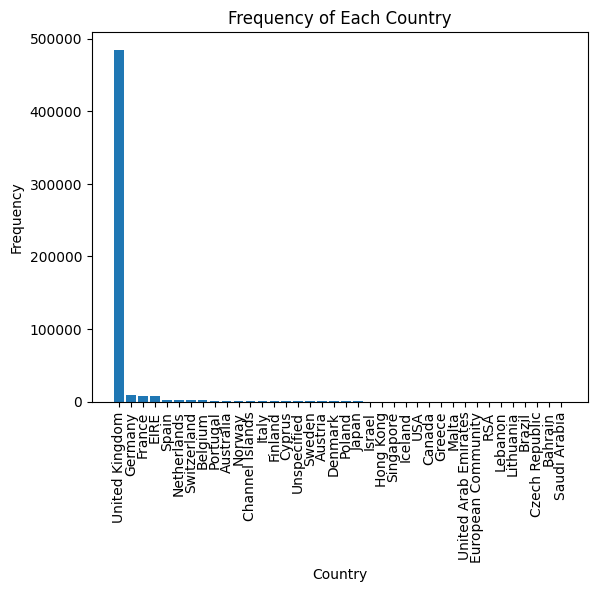

In [16]:
import matplotlib.pyplot as plt

def plot_categorical_histograms(data, variable):
        # Calculate the histogram
        variable_counts = data[variable].value_counts()
        # Plot the histogram
        plt.bar(variable_counts.index, variable_counts.values)
        # Rotate x-axis labels vertically
        plt.xticks(rotation='vertical')
        # Add labels and title
        plt.xlabel(variable)
        plt.ylabel('Frequency')
        plt.title(f'Frequency of Each {variable}')
        # Show the plot
        plt.show()


plot_categorical_histograms(dff, 'Country')


The above bar chart shows country vise frequency and the results shows uk, germany,france and eire are the top countries but the hist right skewed and there is peak at the uk which frequncy is approx of 450k that means most of the 85% of sales belong to UK

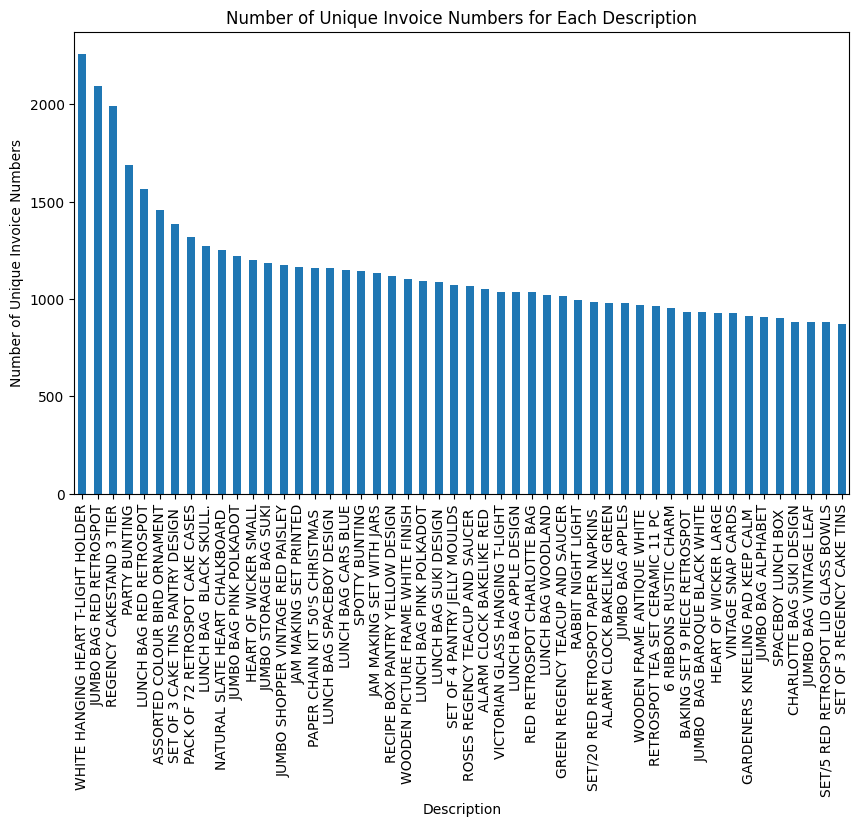

In [17]:
# Group by Description and count unique InvoiceNo for each Description
description_invoice_counts = dff.groupby('Description')['InvoiceNo'].nunique()
top_100_descriptions = description_invoice_counts.nlargest(50)


# Plot the graph with colored bars based on the country names
plt.figure(figsize=(10, 6))
ax = top_100_descriptions.plot(kind='bar')

plt.xlabel('Description')
plt.ylabel('Number of Unique Invoice Numbers')
plt.title('Number of Unique Invoice Numbers for Each Description')
plt.xticks(rotation='vertical')
plt.show()


By looking at the distributions of Invocieno graphs we can find which graphs are more popular with the customers

In [18]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528512 entries, 0 to 540454
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    528512 non-null  object        
 1   StockCode    528512 non-null  object        
 2   Description  528512 non-null  object        
 3   Quantity     528512 non-null  int64         
 4   InvoiceDate  528512 non-null  datetime64[ns]
 5   UnitPrice    528512 non-null  float64       
 6   CustomerID   528512 non-null  float64       
 7   Country      528512 non-null  object        
 8   Total        528512 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 40.3+ MB


# Applying Clustering

In [19]:
import pandas as pd

## by looking at the categorical data  i decided to include the results from them for clustering so i created a dataset with the follwing data
# Calculate total based on numeric columns per customer
total_per_customer = dff.groupby('CustomerID')[['Total']].sum().reset_index()

# Count of invoice numbers per customer
invoice_count_per_customer = dff.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
invoice_count_per_customer.columns = ['CustomerID', 'Invoice_Count']

# Count of unique products per customer
unique_products_per_customer = dff.groupby('CustomerID')['StockCode'].nunique().reset_index()
unique_products_per_customer.columns = ['CustomerID', 'Product_Count']
customer_country = dff.groupby(['CustomerID', 'Country']).size().reset_index(name='Country_Count')


# Merge the counts and totals based on CustomerID
customer_counts_totals = pd.merge(total_per_customer, invoice_count_per_customer, on='CustomerID')
custdf = pd.merge(customer_counts_totals, unique_products_per_customer, on='CustomerID')
custdf = pd.merge(custdf, customer_country, on='CustomerID')



In [20]:
# calculating  the avg total expenditure per invoice
custdf['Avg total per Invoice']= (custdf['Total']/custdf['Invoice_Count'])

In [21]:
custdf.head()

,CustomerID,Total,Invoice_Count,Product_Count,Country,Country_Count,Avg total per Invoice
0,12346.0,77183.60,1,1,United Kingdom,1,77183.600000
1,12347.0,4310.00,7,103,Iceland,182,615.714286
2,12348.0,1437.24,4,21,Finland,27,359.310000
3,12349.0,1457.55,1,72,Italy,72,1457.550000
4,12350.0,294.40,1,16,Norway,16,294.400000


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#by considering the following we can analyse the customer shopping trends like , how much an average of amount spends on the products,
# which customers are more likely to spend more and what country they belong to.
features = ['Total','Invoice_Count','Product_Count','Avg total per Invoice']
X = custdf[features]

# Normalize or Scale the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Reduce dimensionality using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(X_scaled)

In [23]:
from sklearn.cluster import KMeans
# Apply KMeans
kmeans = KMeans(n_clusters=5)  # randomly choosing the k= 5
clusters = kmeans.fit_predict(df_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
import numpy as np

# Helper functions for plotting

def plot_data(X):
    plt.scatter(X[:, 0], X[:, 1], s=2)

def plot_centroids(centroids, circle_color='w', cross_color='k'):
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=35, linewidths=8, color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=2, linewidths=12, color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

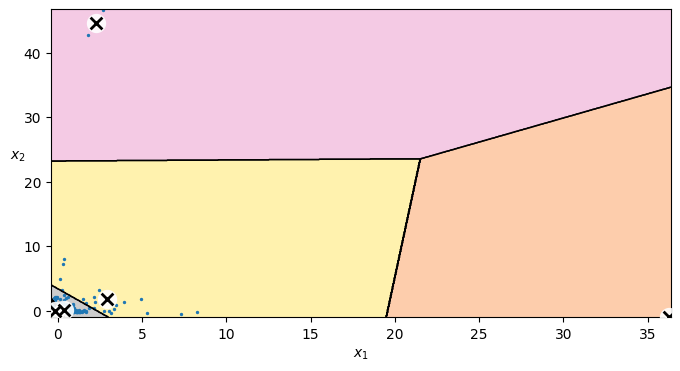

In [25]:
# the following plot shows the centriods and their sections. by looking at the plot we can tell that down-left corner centriods are not
# correctly allocated to the clusters but still it looks good so i wanted to test with elbow method
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, df_pca)
plt.show()

# Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

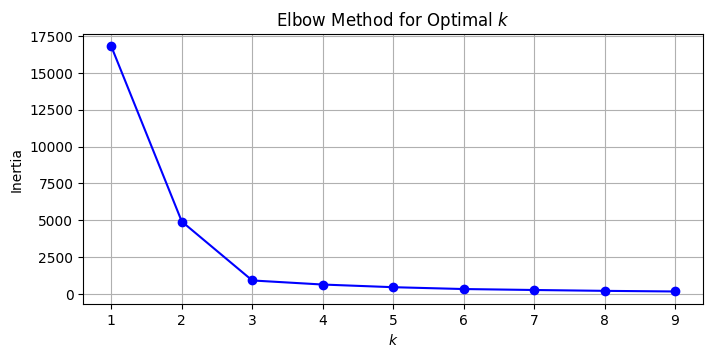

In [26]:
# Apply KMeans for a range of k values
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df_pca) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

# Plot the elbow graph
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal $k$")
plt.grid(True)
plt.show()
## if we take look at the elbow method graph we can tell that the best k vlaues is 2.

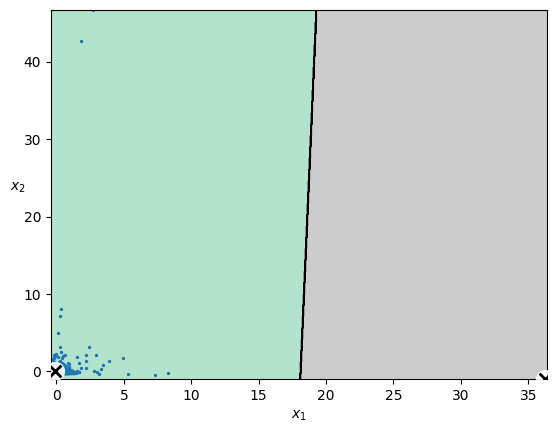

In [27]:
# this is how the k=2 centriods and sections looks like which is  much better than the K=5
plot_decision_boundaries(kmeans_per_k[2-1], df_pca)
plt.show()

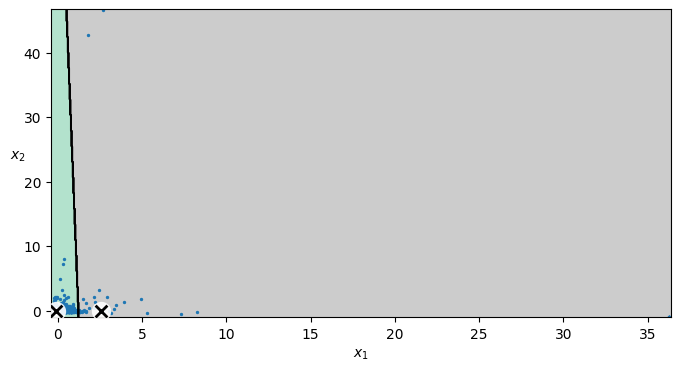

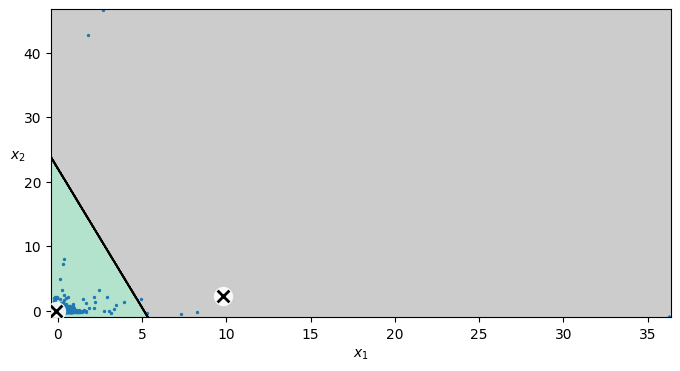

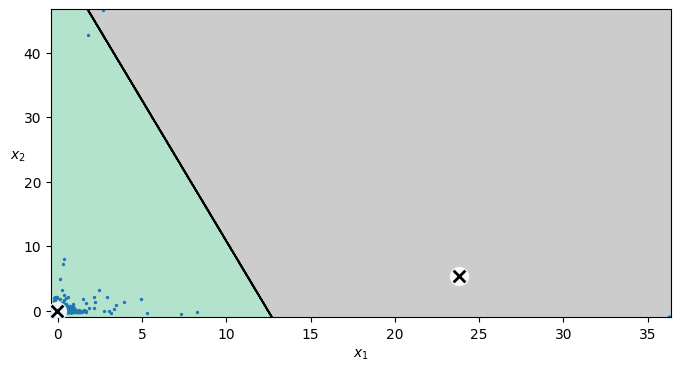

In [28]:
from sklearn.cluster import KMeans
# Apply KMeans by considering the K= 2 and also changing the inertia for better clsutering.

kmeans_iter1 = KMeans(n_clusters=2, init="random", n_init=1, max_iter=1,
                      random_state=42)
kmeans_iter2 = KMeans(n_clusters=2, init="random", n_init=1, max_iter=2,
                      random_state=42)
kmeans_iter3 = KMeans(n_clusters=2, init="random", n_init=1, max_iter=3,
                      random_state=42)
kmeans_iter1.fit(df_pca)
kmeans_iter2.fit(df_pca)
kmeans_iter3.fit(df_pca)
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_iter1, df_pca)
plt.show()
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_iter2, df_pca)
plt.show()
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_iter3, df_pca)
plt.show()

In [29]:
from sklearn.cluster import KMeans
# Apply KMeans by considering the K= 2 and max_iter as 1. adding the clusters to the data set.
# i considered the mas_iter as 1 becuse the centriods are attached better than the others
kmeans2 = KMeans(n_clusters=2, init="random", n_init=1, max_iter=1,
                      random_state=42)
custdf['clusters'] = kmeans2.fit_predict(df_pca)

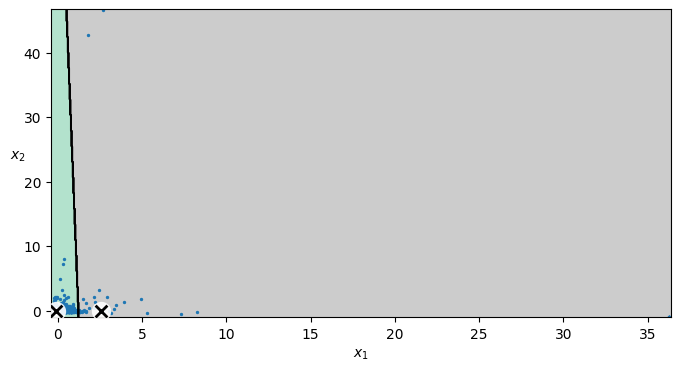

In [30]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans2, df_pca)
plt.show()

Customers data clustering results and the visualization  of the data.

In [31]:
import pandas as pd

# Copy the DataFrame and adding the cluster of the customers group as  'Clusters_c' column
custlabels = dff.copy()
mapping_dict = dict(zip(custdf['CustomerID'], custdf['clusters']))
custlabels['clusters_c'] = custlabels['CustomerID'].map(mapping_dict)
custlabels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528512 entries, 0 to 540454
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    528512 non-null  object        
 1   StockCode    528512 non-null  object        
 2   Description  528512 non-null  object        
 3   Quantity     528512 non-null  int64         
 4   InvoiceDate  528512 non-null  datetime64[ns]
 5   UnitPrice    528512 non-null  float64       
 6   CustomerID   528512 non-null  float64       
 7   Country      528512 non-null  object        
 8   Total        528512 non-null  float64       
 9   clusters_c   528512 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 44.4+ MB


In [32]:
custdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4351 entries, 0 to 4350
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             4351 non-null   float64
 1   Total                  4351 non-null   float64
 2   Invoice_Count          4351 non-null   int64  
 3   Product_Count          4351 non-null   int64  
 4   Country                4351 non-null   object 
 5   Country_Count          4351 non-null   int64  
 6   Avg total per Invoice  4351 non-null   float64
 7   clusters               4351 non-null   int32  
dtypes: float64(3), int32(1), int64(3), object(1)
memory usage: 288.9+ KB


In [33]:
# Analyze the clusters
cluster_analysis = custdf.groupby('clusters')['Total','Invoice_Count','Product_Count','Avg total per Invoice'].mean()
print('Cluster Analysis:')
print(cluster_analysis)
#clearly the group 1 has the highest expenditure. even the avg total per invoice is highest for the group1

Cluster Analysis:
                  Total  Invoice_Count  Product_Count  Avg total per Invoice
clusters                                                                    
0           1570.803115       3.923184      57.427245             372.664725
1         372915.530952     371.547619    1194.000000            5111.089306


<ipython-input-33-64b299120cbb>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster_analysis = custdf.groupby('clusters')['Total','Invoice_Count','Product_Count','Avg total per Invoice'].mean()


In [34]:
# Analyze the clusters
cluster_analysiss = custdf.groupby('clusters')['Total','Invoice_Count','Product_Count','Avg total per Invoice'].sum()
print('Cluster Analysis:')
print(cluster_analysiss)
#clearly the group 1 has the hihest expenditure. even the avg total per invoice is highest for the group1. it is highest with the lowest product counts but
# but customers bought these frequently orin a bulk cause the invoice count is no the highest for that total revenu
# lets look into more graphs to understand better about the customers groups

Cluster Analysis:
                 Total  Invoice_Count  Product_Count  Avg total per Invoice
clusters                                                                   
0         6.768591e+06          16905         247454           1.605812e+06
1         1.566245e+07          15605          50148           2.146658e+05


<ipython-input-34-ba4b2f24fd46>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster_analysiss = custdf.groupby('clusters')['Total','Invoice_Count','Product_Count','Avg total per Invoice'].sum()


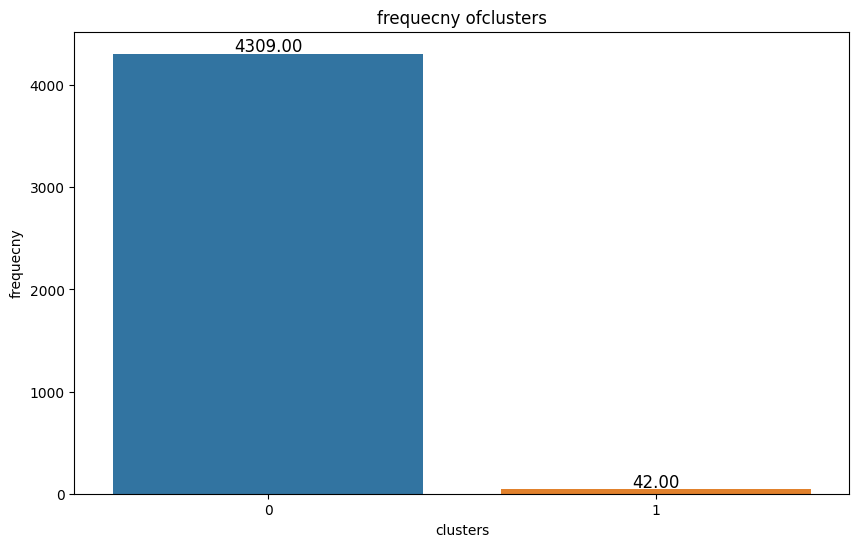

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_frequency(dataframe, cluster_col):
    # Visualization: Clustering groups' frequency
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=cluster_col, data=dataframe)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
        plt.title('frequecny of'+cluster_col)
    plt.xlabel(cluster_col)
    plt.ylabel('frequecny')
    plt.show()

# Call the function to plot clustering groups' frequency
plot_frequency(custdf,'clusters')
# group 1 has the 42 cutomers and group1 has only 4309 customers

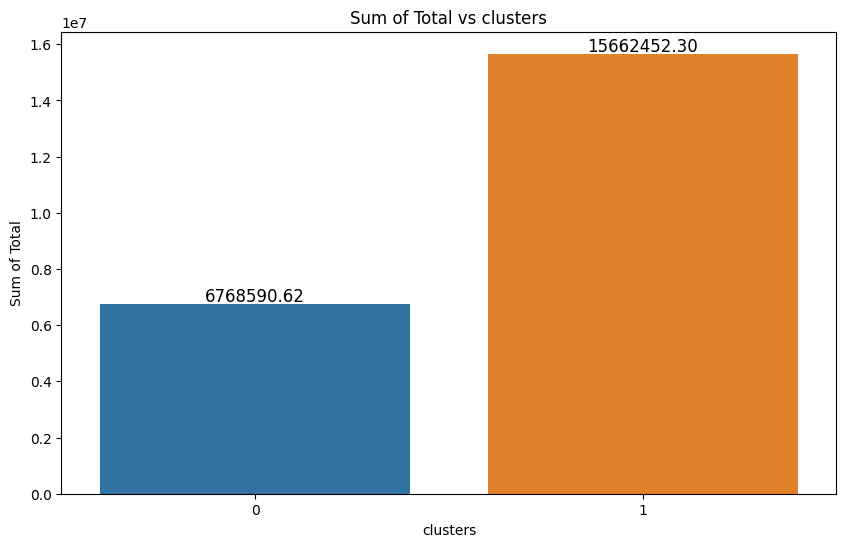

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_barplot(dataframe, xaxis, yaxis, fun):
    # Calculate the desired summary statistic for y-axis values for each x-axis category
    summary_yaxis_values = dataframe.groupby(xaxis)[yaxis].agg(fun).reset_index()

    # Visualization: Total expenditure for each cluster group
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=xaxis, y=yaxis, data=summary_yaxis_values)

    # Annotate the bars with their summary values
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

    plt.title(f'{fun.capitalize()} of {yaxis} vs {xaxis}')
    plt.xlabel(xaxis)
    plt.ylabel(f'{fun.capitalize()} of {yaxis}')
    plt.show()

# Call the function to plot total expenditure for each cluster group
plot_barplot(custdf, 'clusters', 'Total', 'sum')

##even with the highest customers group -0 only has 6million revenue but group 1 has  15 million which means ethier group 1 has more
#more loyaly and frequent buyers or they bought the expensive products.

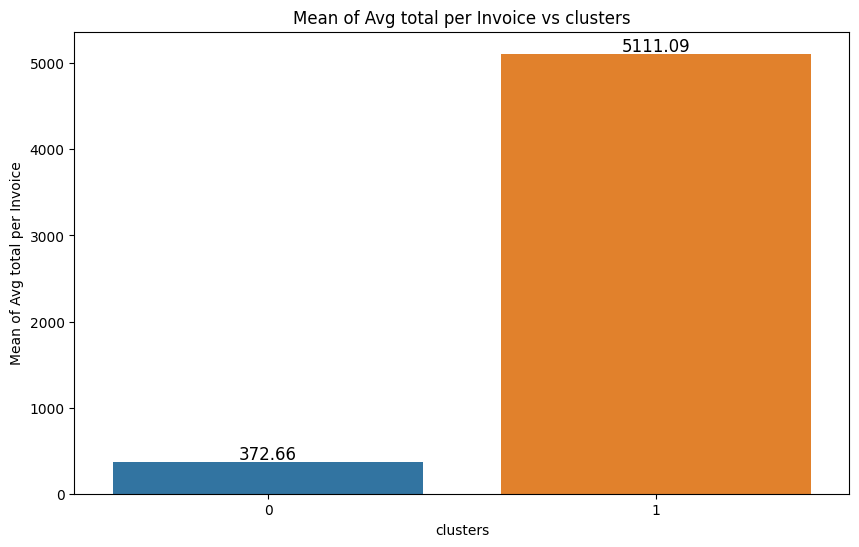

In [37]:
plot_barplot(custdf, 'clusters', 'Avg total per Invoice','mean')
# at the mean of the total expenditure per a single invoice  group1 has the highest on per customer which they spend more than group 0

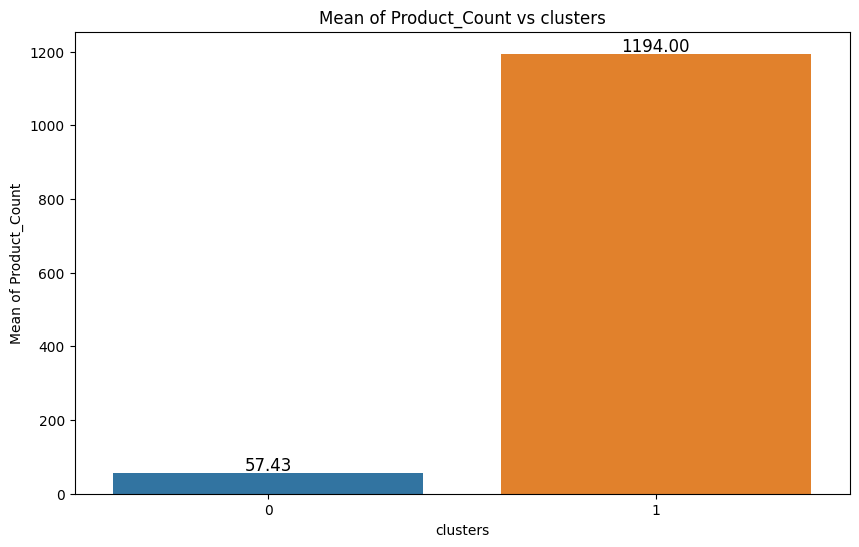

In [38]:
plot_barplot(custdf, 'clusters', 'Product_Count','mean')
# clearly  group 1 has the highest expenditure and every customer bought an average 1197 products and
# every group -0 customers bought an average 57.43 products which is very less than the group 1

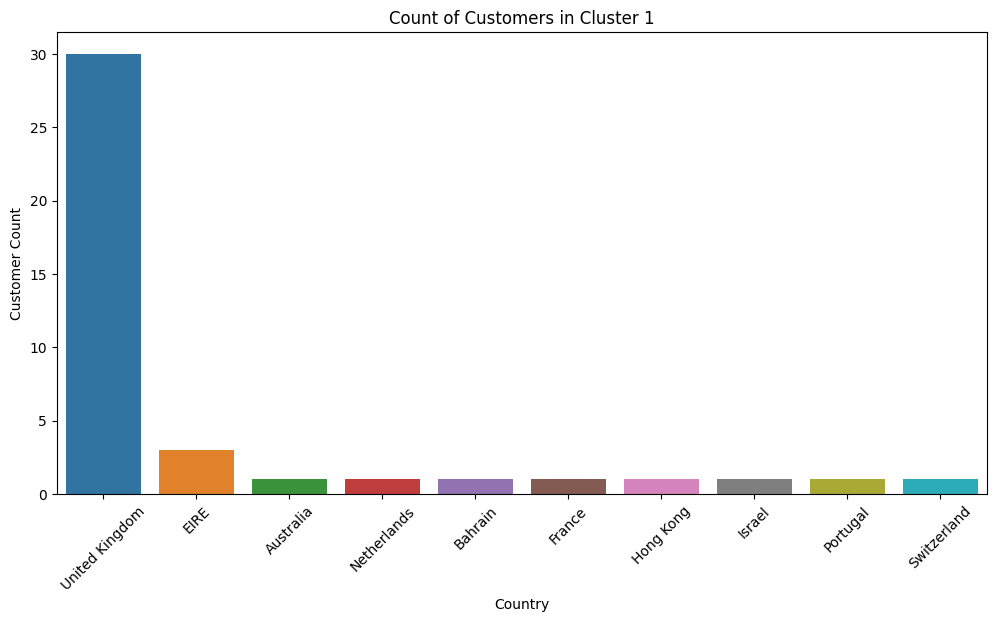

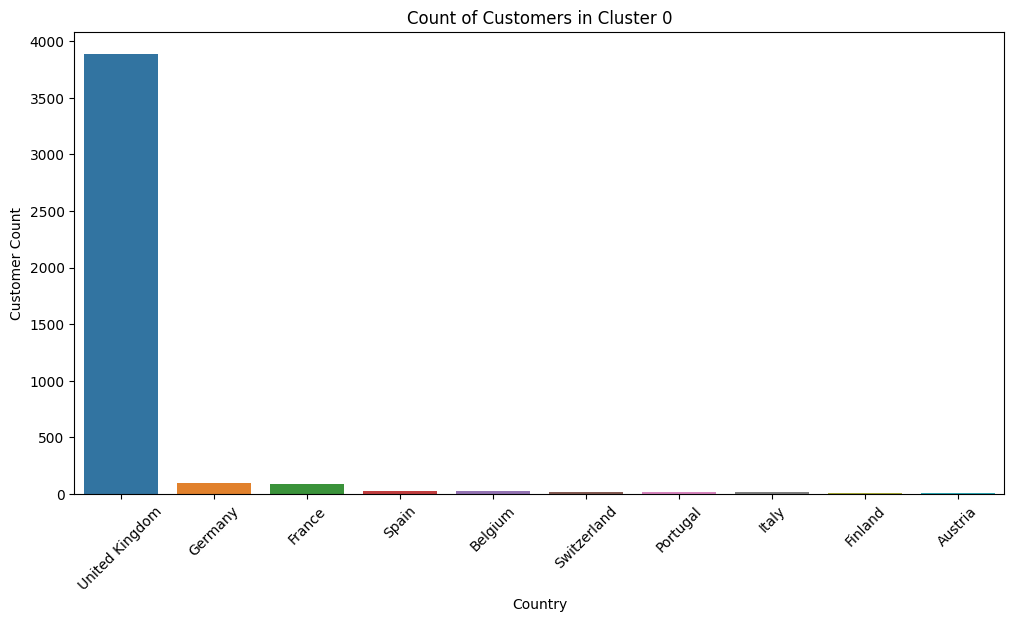

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

clusters = custdf['clusters'].unique()
for cluster in clusters:
    # Filter data for the current cluster
    cluster_data = custdf[custdf['clusters'] == cluster]
    # Get the top 10 countries for the current cluster
    top_n_countries = cluster_data['Country'].value_counts().nlargest(10).index
    # Filter the cluster data to include only the top 10 countries
    filtered_data = cluster_data[cluster_data['Country'].isin(top_n_countries)]
    # Plot count of customers for the current cluster and top countries
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(x='Country', data=filtered_data, order=top_n_countries)
    plt.xlabel('Country')
    plt.ylabel('Customer Count')
    plt.title(f'Count of Customers in Cluster {cluster}')
    plt.xticks(rotation=45)
    plt.show()
## group1 has most of the people from the UK , second highest is ERIE and third highest is Austrila
## group0 has most of the people from the UK , second highest is germany and third highest is france
# in both the groups uk is commonone place. we have loyal and most expenditure customers from group 1 so we have to focuse more
# the countries group 1 customers are from.


In [68]:
prodclusters = custlabels.groupby(['Description', 'StockCode']).agg({'clusters_c': 'unique', 'Quantity': 'sum'}).reset_index()
lucre_products = prodclusters.sort_values(by=['Quantity',], ascending=False).head(10)
# Print the top products and their cluster labels
print("Top Products and their Cluster Labels:")
print(lucre_products)
 # THe follwong products are most bought  products . almots every customer bought the top products.
 # for group 1 PAPER CRAFT , LITTLE BIRDIE ,MEDIUM CERAMIC TOP STORAGE JAR , WORLD WAR 2 GLIDERS ASSTD DESIGNS and JUMBO BAG RED RETROSPOT
 # are the top three so we can focus on marketing these products in the mentioned coutries.

Top Products and their Cluster Labels:
                             Description StockCode clusters_c  Quantity
2482         PAPER CRAFT , LITTLE BIRDIE     23843        [1]     80995
2141      MEDIUM CERAMIC TOP STORAGE JAR     23166     [1, 0]     78033
4094   WORLD WAR 2 GLIDERS ASSTD DESIGNS     84077     [0, 1]     55047
1901             JUMBO BAG RED RETROSPOT    85099B     [0, 1]     48478
4000  WHITE HANGING HEART T-LIGHT HOLDER    85123A     [0, 1]     37603
2785                      POPCORN HOLDER     22197     [0, 1]     36761
245        ASSORTED COLOUR BIRD ORNAMENT     84879     [0, 1]     36461
2432     PACK OF 72 RETROSPOT CAKE CASES     21212     [0, 1]     36419
2845                  RABBIT NIGHT LIGHT     23084     [0, 1]     30788
2201             MINI PAINT SET VINTAGE      22492     [0, 1]     26633


In [41]:
topselpr = custlabels.groupby(['clusters_c', 'Description','StockCode'])['Quantity'].sum()
# Sort the products within each cluster based on summed quantities
sorted_products = topselpr.groupby('clusters_c', group_keys=False).nlargest(5)
# Display the top buying products for each cluster
print(sorted_products)
 # for group 1 PAPER CRAFT , LITTLE BIRDIE ,MEDIUM CERAMIC TOP STORAGE JAR , WORLD WAR 2 GLIDERS ASSTD DESIGNS and JUMBO BAG RED RETROSPOT
 # are the top three so we can focus on marketing these products in the mentioned coutries.

clusters_c  Description                         StockCode
0           WORLD WAR 2 GLIDERS ASSTD DESIGNS   84077        52824
            JUMBO BAG RED RETROSPOT             85099B       38996
            ASSORTED COLOUR BIRD ORNAMENT       84879        32624
            WHITE HANGING HEART T-LIGHT HOLDER  85123A       29165
            POPCORN HOLDER                      22197        27700
1           PAPER CRAFT , LITTLE BIRDIE         23843        80995
            MEDIUM CERAMIC TOP STORAGE JAR      23166        75440
            CHARLOTTE BAG SUKI DESIGN           22355        11530
            PACK OF 72 RETROSPOT CAKE CASES     21212        10522
            RABBIT NIGHT LIGHT                  23084        10437
Name: Quantity, dtype: int64


In [42]:
#can_grsepcl = (custlabels[custlabels['InvoiceNo'].str.contains('C', na=False, case=False)]
 #                .groupby('clusters_c')['InvoiceNo']
 #                .count())
#can_grsepcldf = pd.DataFrame(can_grsepcl)

# Plot the bar graph with annotations
#plt.figure(figsize=(10, 6))
#ax = sns.barplot(x=can_grsepcldf.index, y='InvoiceNo', data=can_grsepcldf, color='skyblue')
#for p in ax.patches:
#    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
#                fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
#plt.xlabel('Cluster')
#plt.ylabel('Count of Invoices starting with C')
#plt.title('Count of Invoices starting with C for each Cluster')
#plt.show()
## if we dint remove the any cancelled products we can find out which customer groups has the most cancellations

# product clustering

In [43]:
# Calculate total revenue, number of unique customers, and total quantity for each product
prdlabels = dff.groupby('StockCode').agg({
    'Total': 'sum',
    'CustomerID': 'nunique',
    'InvoiceNo': 'nunique',
    'Quantity': 'sum'
}).reset_index()

# Rename the columns
prdlabels.columns = ['StockCode', 'Total_Revenue', 'Customer_Count', 'Invoice_Count','Total_Quantity']
## with the mentioned  attributes we will know what products generates most revenue , most popular among the customers and
#higher transaction activity or a larger number of sales transactions.

In [44]:
# calculating  the avg total expenditure per invoice
prdlabels['Avg total per Invoice']= (prdlabels['Total_Revenue']/prdlabels['Invoice_Count'])

In [45]:
prdlabels.head()

,StockCode,Total_Revenue,Customer_Count,Invoice_Count,Total_Quantity,Avg total per Invoice
0,10002,759.89,41,71,860,10.702676
1,10080,119.09,20,23,325,5.177826
2,10120,40.53,25,29,193,1.397586
3,10123C,3.25,3,3,5,1.083333
4,10124A,6.72,5,5,16,1.344000


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


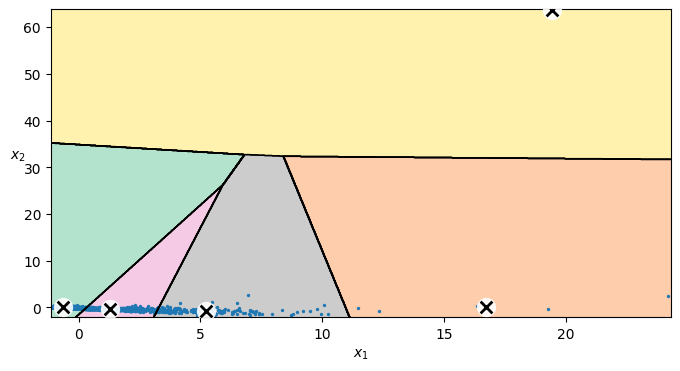

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['Total_Revenue', 'Customer_Count','Invoice_Count','Avg total per Invoice']
X = prdlabels[features]

# Normalize or Scale the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Reduce dimensionality using PCA
pca = PCA(n_components=2)
df_pcapr = pca.fit_transform(X_scaled)
from sklearn.cluster import KMeans
# Apply KMeans
kmeans4 = KMeans(n_clusters=5)  # randomly choosing the k= 5
clusters = kmeans4.fit_predict(df_pcapr)
# the following plot shows the centriods and their sections. by looking at the plot we can tell that down-left corner centriods are not
# correctly allocated to the clusters.
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans4, df_pcapr)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

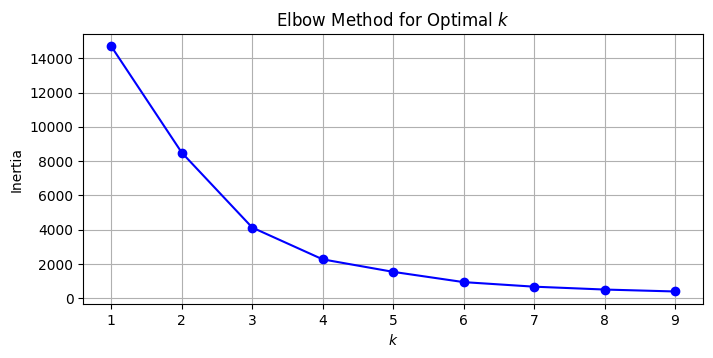

In [47]:
# Apply KMeans for a range of k values
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df_pcapr) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

# Plot the elbow graph
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal $k$")
plt.grid(True)
plt.show()

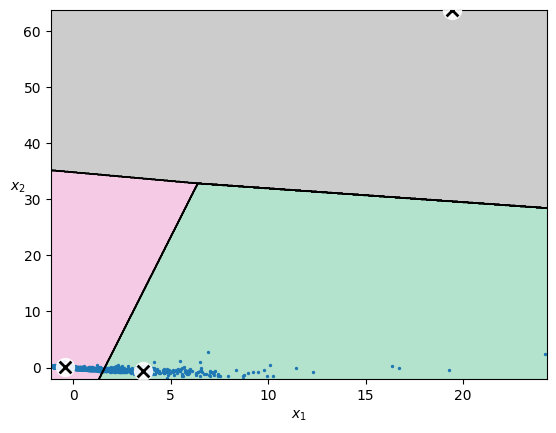

In [48]:
# by considering elbow method results this is how the k=3 centriods and sections looks like which is  much better than the K=5.
plot_decision_boundaries(kmeans_per_k[3-1], df_pcapr)
plt.show()

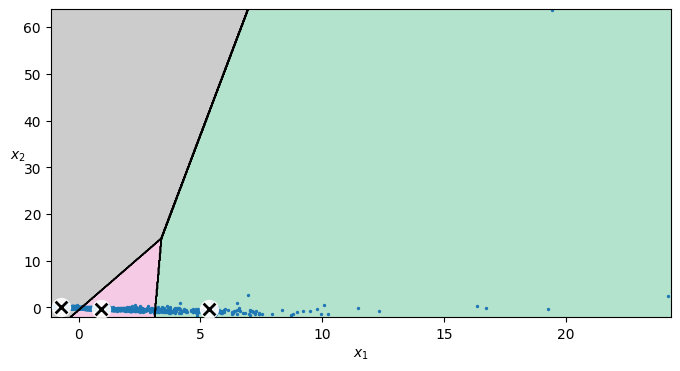

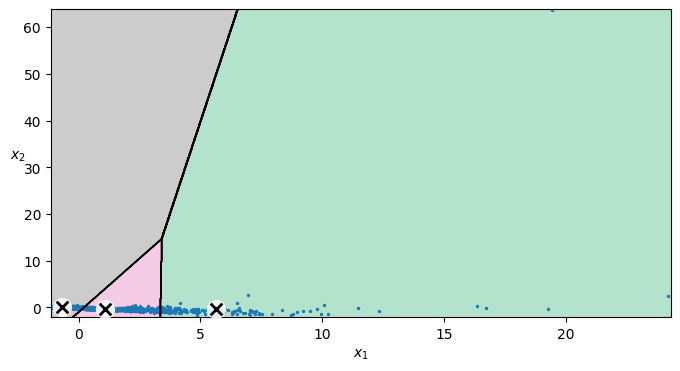

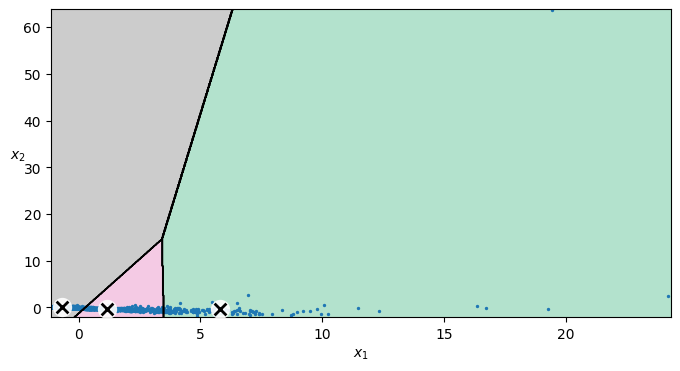

In [49]:
from sklearn.cluster import KMeans
# Apply KMeans by considering the K= 3 and also changing the inertia for better centriods .

kmeans2_iter1 = KMeans(n_clusters=3, init="random", n_init=1, max_iter=4,
                      random_state=42)
kmeans2_iter2 = KMeans(n_clusters=3, init="random", n_init=1, max_iter=5,
                      random_state=42)
kmeans2_iter3 = KMeans(n_clusters=3, init="random", n_init=1, max_iter=6,
                      random_state=42)
kmeans2_iter1.fit(df_pcapr)
kmeans2_iter2.fit(df_pcapr)
kmeans2_iter3.fit(df_pcapr)
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans2_iter1, df_pcapr)
plt.show()
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans2_iter2, df_pcapr)
plt.show()
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans2_iter3, df_pcapr)
plt.show()

In [50]:
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
# Apply KMeans by considering the K= 2 and max_iter as 3. adding the clusters to the data set.

kmeans3 = KMeans(n_clusters=3, init="random", n_init=1, max_iter=6,
                      random_state=42)
prdlabels['clusters'] = kmeans3.fit_predict(df_pcapr)

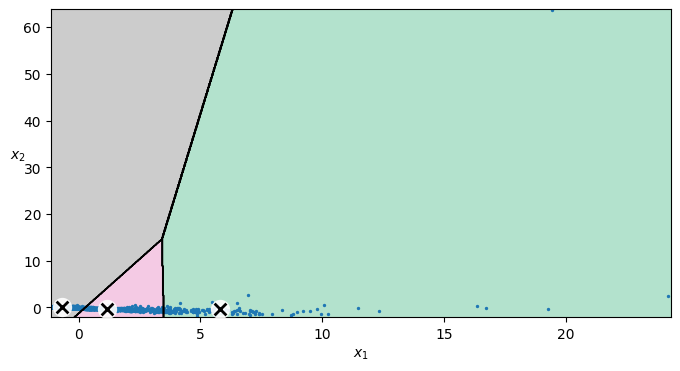

In [51]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans3, df_pcapr)
plt.show()
# this how the our finl decision boundarie looks like

In [52]:
# Create a mapping dictionary between StockCode and clusters from prdlabels
stockcode_clusters_mapping = prdlabels.set_index('StockCode')['clusters'].to_dict()
# Map 'StockCode' to 'clusters' for each row in custlabels
custlabels['cluster_p'] = custlabels['StockCode'].map(stockcode_clusters_mapping)
custlabels.info() # now we have one dat set with the customer groups and prodcut groups so now can derive  the relation between them

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528512 entries, 0 to 540454
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    528512 non-null  object        
 1   StockCode    528512 non-null  object        
 2   Description  528512 non-null  object        
 3   Quantity     528512 non-null  int64         
 4   InvoiceDate  528512 non-null  datetime64[ns]
 5   UnitPrice    528512 non-null  float64       
 6   CustomerID   528512 non-null  float64       
 7   Country      528512 non-null  object        
 8   Total        528512 non-null  float64       
 9   clusters_c   528512 non-null  int64         
 10  cluster_p    528512 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 48.4+ MB


In [53]:
prdlabels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3917 entries, 0 to 3916
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   StockCode              3917 non-null   object 
 1   Total_Revenue          3917 non-null   float64
 2   Customer_Count         3917 non-null   int64  
 3   Invoice_Count          3917 non-null   int64  
 4   Total_Quantity         3917 non-null   int64  
 5   Avg total per Invoice  3917 non-null   float64
 6   clusters               3917 non-null   int32  
dtypes: float64(2), int32(1), int64(3), object(1)
memory usage: 199.0+ KB


In [54]:
# Analyze the clusters
clusterp_analysis = prdlabels.groupby('clusters')['Total_Revenue', 'Customer_Count','Invoice_Count','Avg total per Invoice'].mean()
print('Cluster Analysis:')
print(clusterp_analysis)
# group 0  has the highest total revenue , group 1 is the second and group 2 is the third hihes in every attributes.

Cluster Analysis:
          Total_Revenue  Customer_Count  Invoice_Count  Avg total per Invoice
clusters                                                                     
0          25880.442452      366.806452     828.135484            1117.816352
1           5246.214478      157.615291     289.968447              18.251854
2            661.953902       28.167120      51.298843              14.286860


<ipython-input-54-53708ae8ed2b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  clusterp_analysis = prdlabels.groupby('clusters')['Total_Revenue', 'Customer_Count','Invoice_Count','Avg total per Invoice'].mean()


In [55]:
# Analyze the clusters
clusterp_analysiss = prdlabels.groupby('clusters')['Total_Revenue', 'Customer_Count','Invoice_Count','Avg total per Invoice'].sum()
print('Cluster Analysis:')
print(clusterp_analysiss)
# if we consider the sum of the attributes the group 1 has the highest 43total revenue , group 0 is the second and group 2 is third

Cluster Analysis:
          Total_Revenue  Customer_Count  Invoice_Count  Avg total per Invoice
clusters                                                                     
0           4011468.580           56855         128361          173261.534583
1           4322880.730          129875         238934           15039.527615
2           1944820.563           82755         150716           41974.795187


<ipython-input-55-a9760d523c23>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  clusterp_analysiss = prdlabels.groupby('clusters')['Total_Revenue', 'Customer_Count','Invoice_Count','Avg total per Invoice'].sum()


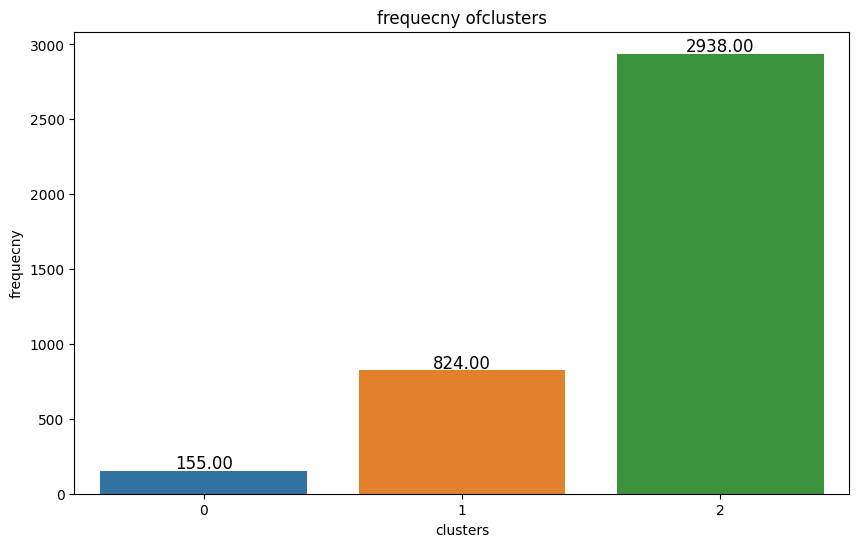

In [56]:
plot_frequency(prdlabels,'clusters')
# group 2 has 2938 , group 1 has 824 and group 0 has 155 products


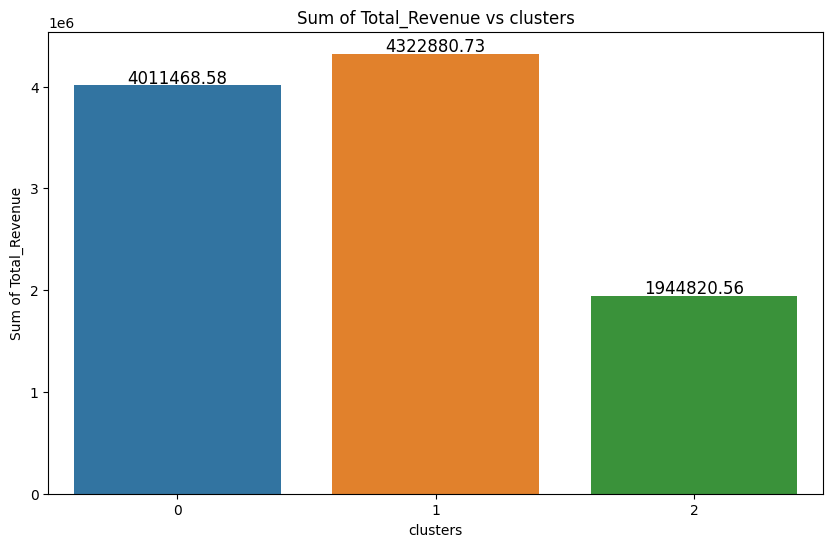

In [57]:
# Call the function to plot total expenditure for each cluster group
plot_barplot(prdlabels, 'clusters', 'Total_Revenue','sum')
# even with 155 products ion group 0 it generated the secodn highest total revenue which measn this group of prodcuts might be very
#popular or very expensive and group.1  has highest sum of total revenue and group 2 has third highest sum of total revenue

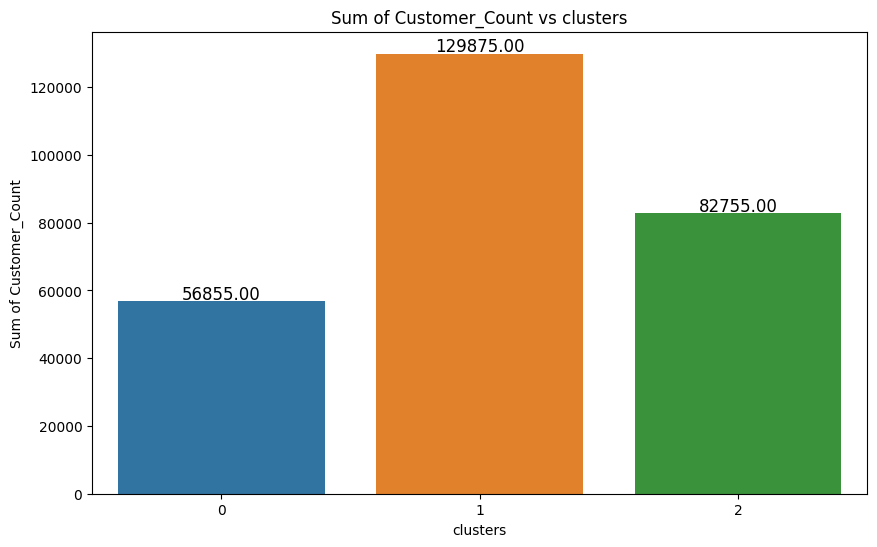

In [58]:
plot_barplot(prdlabels, 'clusters', 'Customer_Count','sum')
# group 1 is the highest , group 2 is the second highest and group 0 is the third highest. even lowest cutomer count ths group 0 has
# generated a second highest revenue which might be becuse of their popularity. only group 2 doesnt generated as much as group 0 even with the secind highest customer count
#so the company should on group 2 products

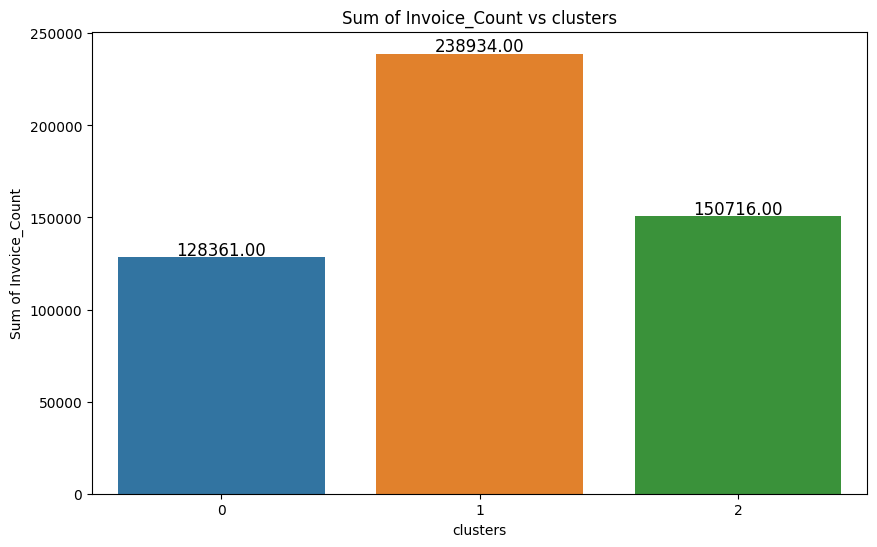

In [59]:
plot_barplot(prdlabels, 'clusters', 'Invoice_Count','sum')
# group 1 is the highest , group 0 is the second highest and group 2 is the third highest.

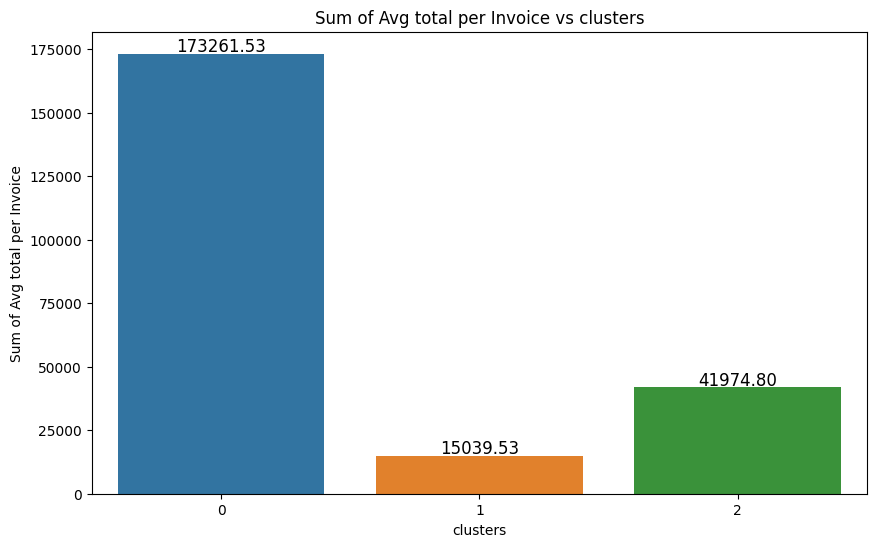

In [60]:
plot_barplot(prdlabels, 'clusters', 'Avg total per Invoice','sum')
#group 0 has the highest , group 2 has the second highest and group 1 is the third highest
# even with lowest prodcts these group has the highest average total per invocie which these products are popular or peolpe will them frequently.
#comparetivly the group 2 with the should have done much better but it is second highest so the company should focus more on this products.

In [61]:
# Group by clusters_c and select the top 10 lucrative products for each group
top_lucrative_per_cluster = (prdlabels.groupby('clusters')
                             .apply(lambda x: x.nlargest(10, 'Total_Revenue'))
                             .reset_index(drop=True))

# Iterate over each clusters_c group and display the top lucrative products
for cluster_c in top_lucrative_per_cluster['clusters'].unique():
    cluster_c_data = top_lucrative_per_cluster[top_lucrative_per_cluster['clusters'] == cluster_c]

    print(f'Top Lucrative Products for clusters_c {cluster_c}:')
    print(cluster_c_data.head(5))
  # the top stockids which generated highest revenue in their group are listed below.

Top Lucrative Products for clusters_c 0:
  StockCode  Total_Revenue  Customer_Count  Invoice_Count  Total_Quantity  \
0     22423      174484.74             882           1989           13890   
1     23843      168469.60               1              1           80995   
2    85123A      104518.80             857           2203           41664   
3     47566       99504.33             708           1686           18299   
4    85099B       94340.05             636           2092           48478   

   Avg total per Invoice  clusters  
0              87.724857         0  
1          168469.600000         0  
2              47.443849         0  
3              59.017989         0  
4              45.095626         0  
Top Lucrative Products for clusters_c 1:
   StockCode  Total_Revenue  Customer_Count  Invoice_Count  Total_Quantity  \
10     48185       23888.81             144            365            3617   
11     21623       23010.09             140            221            3272   

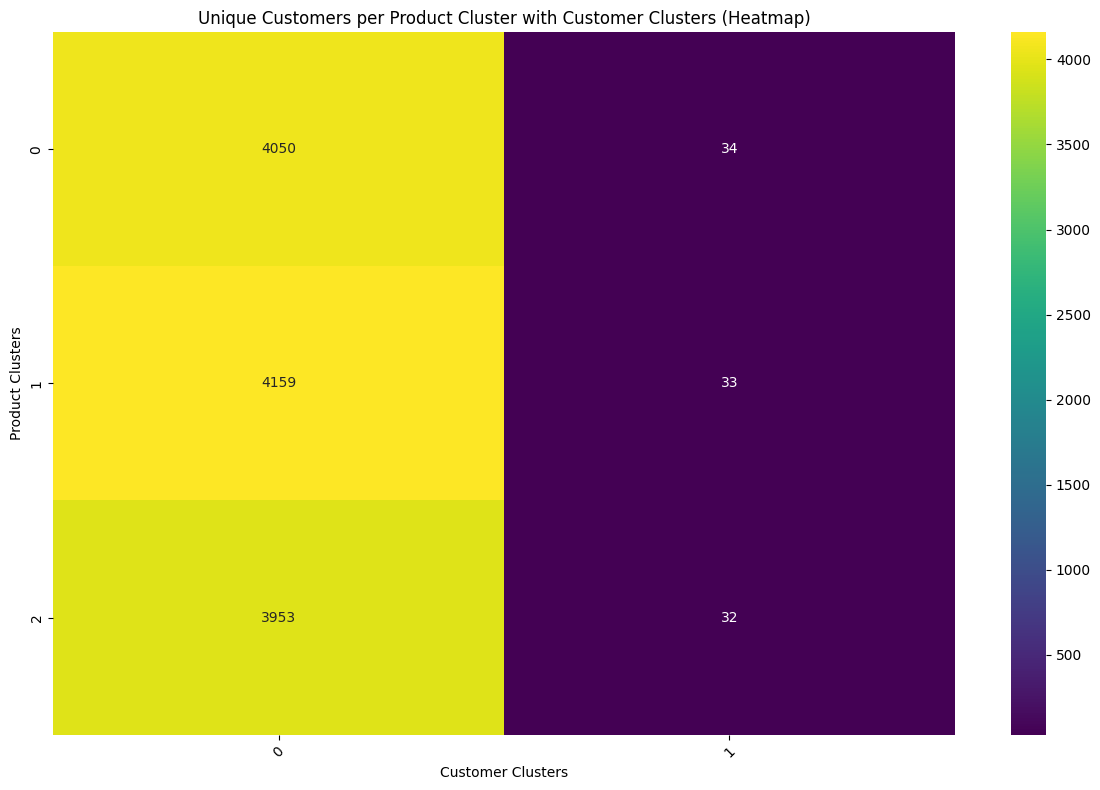

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create a DataFrame with product cluster, customer cluster, and unique customers
data = custlabels.groupby(['cluster_p', 'clusters_c'])['CustomerID'].nunique().reset_index()


heatmap_data = data.pivot_table(index='cluster_p', columns='clusters_c', values='CustomerID', fill_value=0)
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='viridis', cbar=True)
plt.xlabel('Customer Clusters')
plt.ylabel('Product Clusters')
plt.title('Unique Customers per Product Cluster with Customer Clusters (Heatmap)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# the group 0 customers are the highest in every group of the products.  there are total 4315 unique customers
# in thise group 0 prodcts were bought by 4084 custoemrs , group 1 prodcust were bought by 4192 cutoemers
# and group 2 prodcust were bought by the only 3985 customers which means these are not so popular.

In [63]:
#can_grsepcl = (custlabels[custlabels['InvoiceNo'].str.contains('C', na=False, case=False)]
##                 .groupby('cluster_p')['InvoiceNo']
 #                .count())
#can_grsepcldf = pd.DataFrame(can_grsepcl)

# Plot the bar graph with annotations
#plt.figure(figsize=(10, 6))
#ax = sns.barplot(x=can_grsepcldf.index, y='InvoiceNo', data=can_grsepcldf, color='skyblue')
#for p in ax.patches:
 #   ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
 #               fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
#plt.xlabel('Cluster products')
#plt.ylabel('Count of Invoices starting with C')
#plt.title('Count of Invoices starting with C for each Cluster')
#plt.show()

In [64]:
# Group by cluster_p, Description, and StockCode and aggregate the unique clusters and total revenue
prodclusters = custlabels.groupby(['cluster_p', 'StockCode']).agg({'Description': 'unique','clusters_c': 'unique', 'Total': 'sum'}).reset_index()

# Sort the products within each cluster_p based on total revenue
sorted_lucrative_products = prodclusters.groupby('cluster_p', group_keys=False).apply(lambda x: x.nlargest(5, 'Total'))
sorted_lucrative_products.head(20)
# every lucrative products in their group has the cusotemrs from group 0 and group 1.

,cluster_p,StockCode,Description,clusters_c,Total
64,0,22423,[REGENCY CAKESTAND 3 TIER],"[0, 1]",174484.74
129,0,23843,"[PAPER CRAFT , LITTLE BIRDIE]",[1],168469.60
153,0,85123A,"[WHITE HANGING HEART T-LIGHT HOLDER, ?, CREAM ...","[0, 1]",104518.80
130,0,47566,[PARTY BUNTING],"[1, 0]",99504.33
150,0,85099B,[JUMBO BAG RED RETROSPOT],"[0, 1]",94340.05
914,1,48185,[DOORMAT FAIRY CAKE],"[0, 1]",23888.81
282,1,21623,[VINTAGE UNION JACK MEMOBOARD],"[0, 1]",23010.09
159,1,15056N,[EDWARDIAN PARASOL NATURAL],"[1, 0]",22176.49
934,1,84029E,[RED WOOLLY HOTTIE WHITE HEART.],"[0, 1]",22144.98
268,1,21523,[DOORMAT FANCY FONT HOME SWEET HOME],"[1, 0]",21601.69


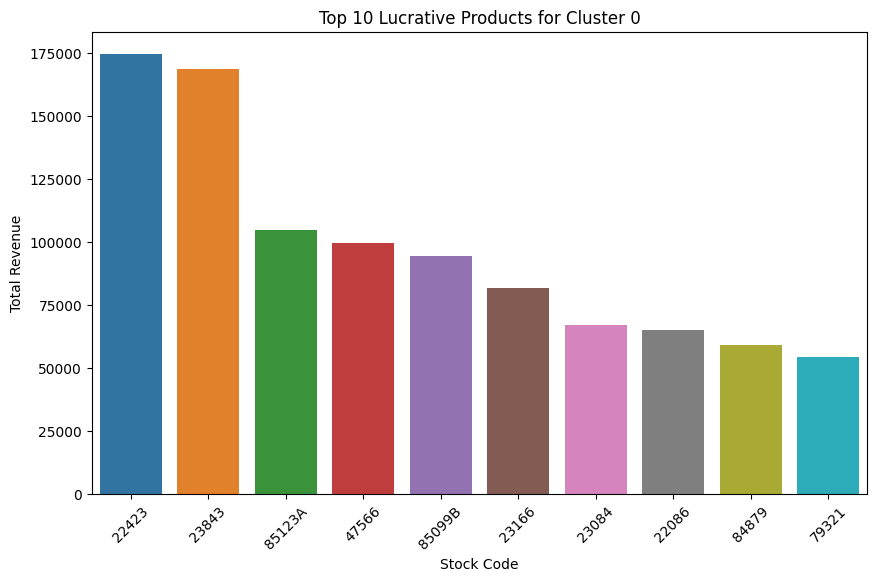

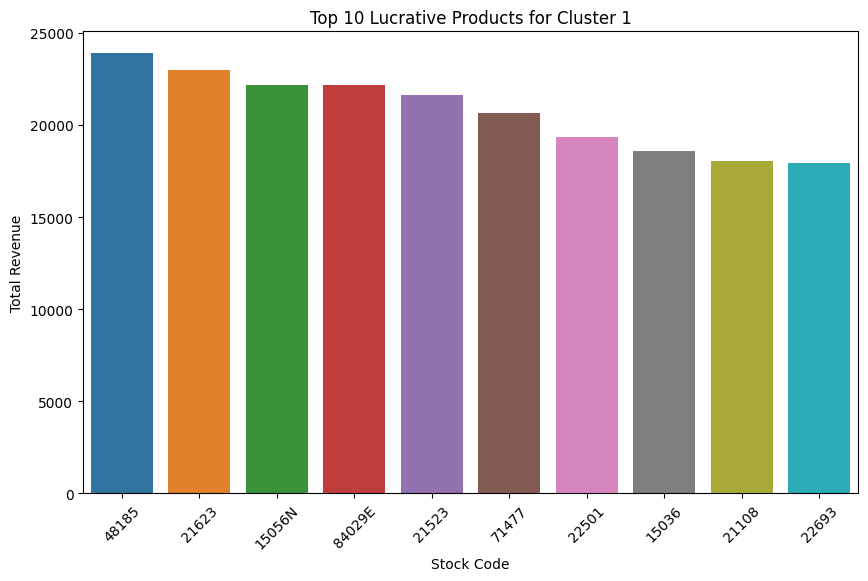

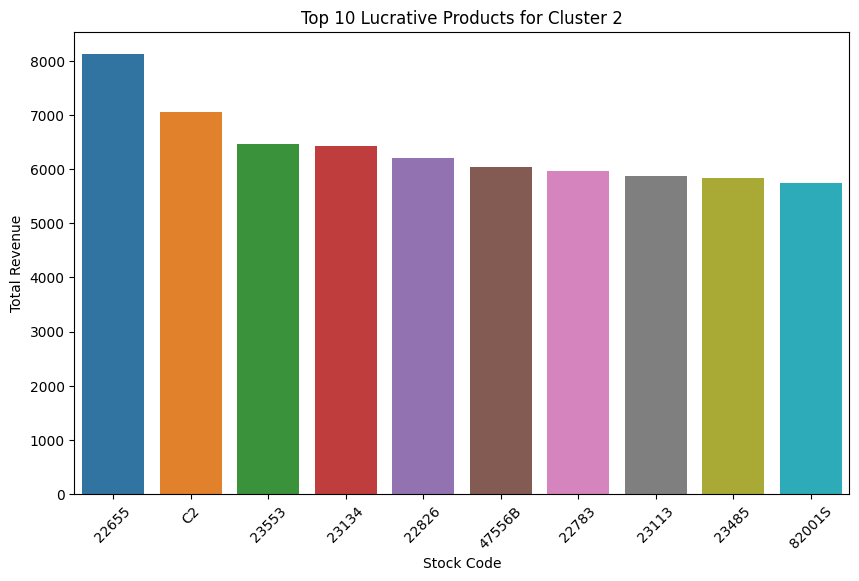

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Iterate over each cluster and create a bar graph
for cluster in top_lucrative_per_cluster['clusters'].unique():
    cluster_data = top_lucrative_per_cluster[top_lucrative_per_cluster['clusters'] == cluster]

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='StockCode', y='Total_Revenue', data=cluster_data)
    plt.title(f'Top 10 Lucrative Products for Cluster {cluster}')
    plt.xlabel('Stock Code')
    plt.ylabel('Total Revenue')
    plt.xticks(rotation=45)
    plt.show()

# the grpah of the top 10 highest revenue prodcuts in their particular groups

In [67]:
# Group by StockCode and calculate the total revenue for each product
product_total_revenue =custlabels.groupby(['cluster_p', 'StockCode']).agg({'clusters_c': 'unique', 'Total': 'sum'}).reset_index()

# Sort the products based on total revenue and select the top 10
top_lucrative_products = product_total_revenue.sort_values(by='Total', ascending=False).head(10)

top_lucrative_products.head(20)
## by considering all the products the top products

,cluster_p,StockCode,clusters_c,Total
64,0,22423,"[0, 1]",174484.74
129,0,23843,[1],168469.60
153,0,85123A,"[0, 1]",104518.80
130,0,47566,"[1, 0]",99504.33
150,0,85099B,"[0, 1]",94340.05
105,0,23166,"[1, 0]",81700.92
104,0,23084,"[0, 1]",66964.99
41,0,22086,"[0, 1]",64952.29
144,0,84879,"[0, 1]",59094.93
134,0,79321,"[0, 1]",54117.76
